# Загрузка данных и предварительная обработка

В данном ноутбуке мы загрузим данные в формате pandas DataFrame, исследуем их, предобработаем и выгрузим их в новый файл.

Кроме того, попробуем сделать базовые предположения о дальнейшем подходе к решению поставленной задачи.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
df = pd.read_csv("/content/drive/MyDrive/intern_task.csv")
df.head(10)

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
5,1,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.200000,0.974819,22.936731,0.333333,0.033233,0.000093,28.0,9.333333
6,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,3.0,16.200000,0.000000,0.945281,18.240926,0.000000,0.013008,0.000023,5.0,1.666667
7,0,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0,10,2.0,0.0,1.0,0.0,2.0,0.666667,0.0,0.333333,...,218.0,55.069946,0.000000,0.448807,4.695805,0.000000,0.002153,0.000002,5.0,1.666667
9,0,10,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.975608,0.000000,0.000000,0.021583,0.000040,9.0,3.000000


In [90]:
df.shape

(235258, 146)

Предложенные данные содержат 235258 записей и 146 столбцов, из которых:

- *query_id* - идентификатор поисковой сессии
- *feature_i* - признаки документа ($i \in [0, 143]$)
- *rank* - ранк документа

Таким образом, внутри одной поисковой сессии (записи с одинаковым *query_id*) содержатся несколько документов, каждому из которых соответсвуют определенные фичи и соответсвующих ранк документа в поисковой сессии.

In [91]:
# Посмотрим на типы признаков:
data_types = df.dtypes
data_types[data_types != np.float64]

rank           int64
query_id       int64
feature_64     int64
feature_65     int64
feature_72     int64
feature_100    int64
dtype: object

Заметим, что строковые признаки отсуствуют. Есть данные, помечанные как целочисленные.

In [93]:
# Посмотрим, какие уникальные значения они содержат:

print('feature_64 : ', df['feature_64'].unique())
print('feature_65 : ', df['feature_65'].unique())
print('feature_72 : ', df['feature_72'].unique())
print('feature_100 : ', df['feature_100'].unique())

feature_64 :  [0]
feature_65 :  [0]
feature_72 :  [1]
feature_100 :  [0]


Данные признаки содержат только по одному уникальному значению, поэтому можно считать их неинформативными. Удалим их.

In [94]:
df = df.drop(columns=['feature_64', 'feature_65', 'feature_72', 'feature_100'])

In [95]:
print('Количество поисковых сессий: ', len(df['query_id'].unique()))
print('Значения ранга : ', df['rank'].unique())

Количество поисковых сессий:  2000
Значения ранга :  [0 1 2 4 3]


In [96]:
missing_values = df.isnull().sum().sum() + df.isna().sum().sum()
if not missing_values:
  print("Пропущенных или NaN значений нет")

Пропущенных или NaN значений нет


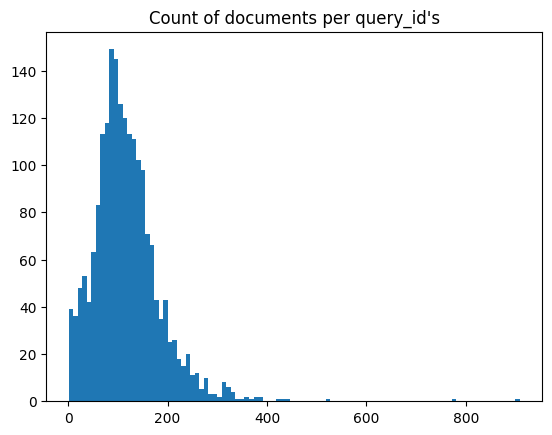

Average count :  117.629
Min count :  1
Max count :  908


In [97]:
# Визуализируем распределение количества документов, соответсвующих поисковым сессиям:

DOCS_COUNT = [len(df[df['query_id'] == id]) for id in df['query_id'].unique()]
plt.hist(DOCS_COUNT, bins=100)
plt.title('Count of documents per query_id\'s')
plt.show()
print('Average count : ', np.mean(DOCS_COUNT))
print('Min count : ', np.min(DOCS_COUNT))
print('Max count : ', np.max(DOCS_COUNT))

Спроектируем пространство признаков в пространство меньшей размерности (2) и посмотрим на распределение меток ранга:

In [ ]:
! pip install umap-learn

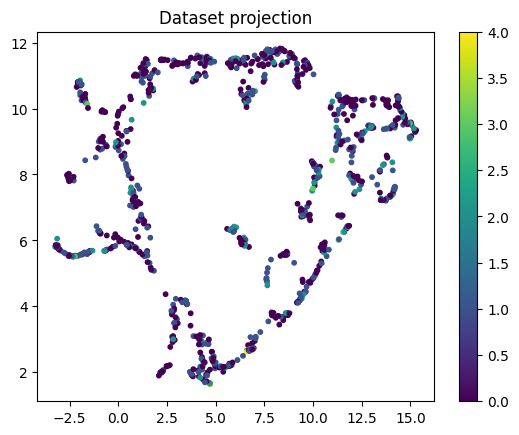

In [98]:
import umap
X = df.drop(columns=['rank', 'query_id'])
X = X.iloc[150000:151000]
y = df['rank']
y = y.iloc[150000:151000]

reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', s=10)
plt.title('Dataset projection')
plt.colorbar()
plt.show()

Четкой кластерной структуры меток ранга обнаружить не удалось.

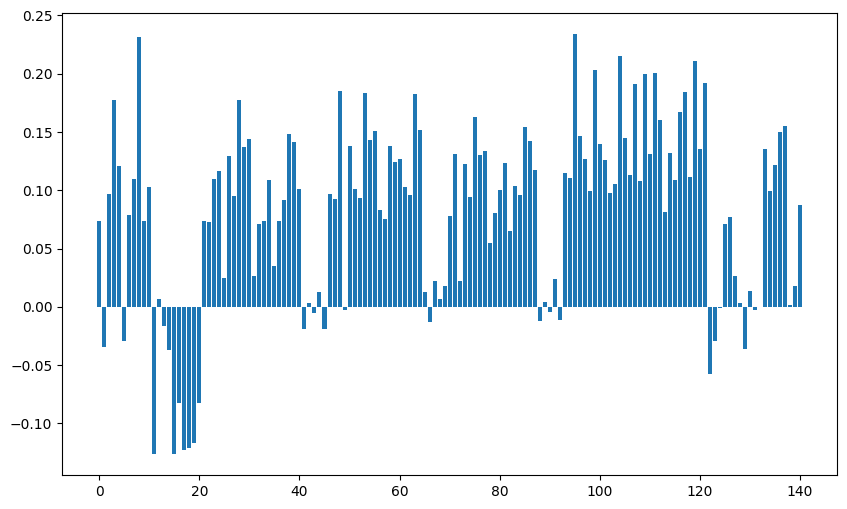

In [26]:
# Посмотрим на корреляцию признаков объектов и целевой метки:

correlations = df.corrwith(df['rank'])

correlations = correlations.drop('rank')

plt.figure(figsize=(10, 6))
plt.bar(range(len(correlations)), correlations)
plt.show()

In [27]:
# Запомним параметры, которые имеют низкую корреляцию:

correlations[abs(correlations) < 0.05]

feature_0     -0.034239
feature_4     -0.029628
feature_11     0.006681
feature_12    -0.016788
feature_13    -0.037126
feature_24     0.024338
feature_30     0.026291
feature_34     0.034690
feature_40    -0.018965
feature_41     0.003287
feature_42    -0.004976
feature_43     0.012620
feature_44    -0.019365
feature_48    -0.002392
feature_66     0.013136
feature_67    -0.012622
feature_68     0.021838
feature_69     0.006823
feature_70     0.017650
feature_74     0.022350
feature_90    -0.011742
feature_91     0.004406
feature_92    -0.004536
feature_93     0.024097
feature_94    -0.011572
feature_126   -0.029471
feature_127   -0.001096
feature_130    0.026050
feature_131    0.003224
feature_132   -0.036092
feature_133    0.013793
feature_134   -0.002400
feature_135   -0.000130
feature_141    0.001207
feature_142    0.017734
dtype: float64

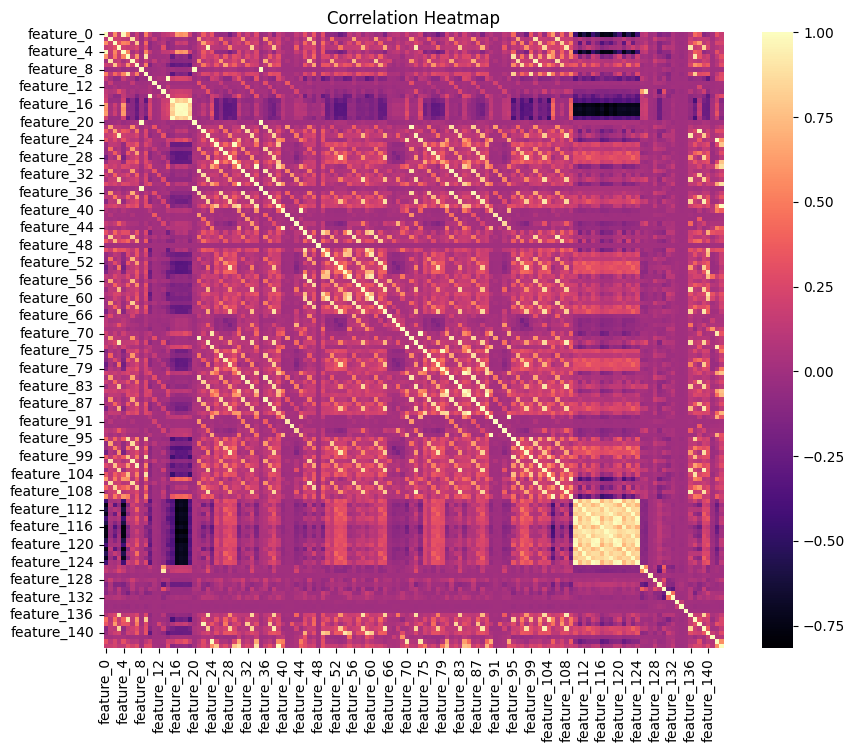

In [30]:
# Построим heatmap корреляций признаков между собой

corr_matrix = df.drop(columns=['query_id', 'rank']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='magma')
plt.title("Correlation Heatmap")
plt.show()

Исходя из визуализации heatmap, можно увидеть, что некоторые признаки существенно зависят от других.

Аналогично, выделим такие признаки и из коррелирующих признаков, оставим только один:

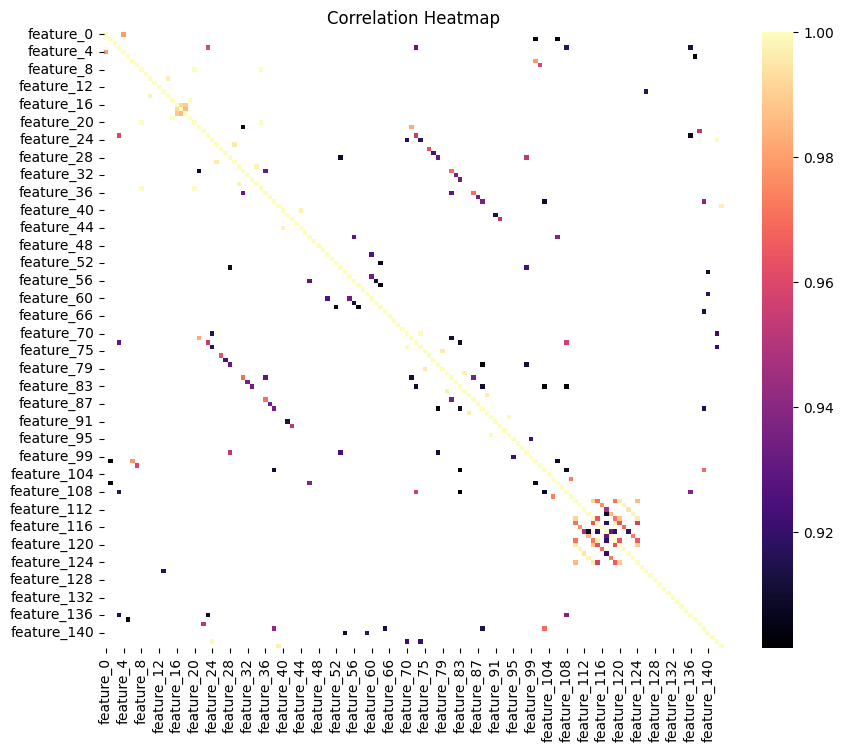

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[abs(corr_matrix) > 0.9], cmap='magma')
plt.title("Correlation Heatmap")
plt.show()

In [55]:
high_corr = (corr_matrix.abs() > 0.9)

upper_triangular = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool)) # верхнетреугольная маска


to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] == True)]
np.array(to_drop)

array(['feature_4', 'feature_14', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_23', 'feature_29',
       'feature_31', 'feature_34', 'feature_35', 'feature_36',
       'feature_44', 'feature_53', 'feature_56', 'feature_60',
       'feature_61', 'feature_62', 'feature_70', 'feature_71',
       'feature_73', 'feature_74', 'feature_76', 'feature_77',
       'feature_78', 'feature_79', 'feature_81', 'feature_82',
       'feature_83', 'feature_84', 'feature_86', 'feature_87',
       'feature_88', 'feature_89', 'feature_91', 'feature_92',
       'feature_94', 'feature_98', 'feature_99', 'feature_101',
       'feature_102', 'feature_103', 'feature_106', 'feature_108',
       'feature_109', 'feature_114', 'feature_115', 'feature_116',
       'feature_117', 'feature_118', 'feature_119', 'feature_120',
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_126', 'feature_136', 'feature_137', 'feature_138',
       'feature_139', 'feature_140'

Постмотрим признаки, которые имеют слишком высокую корреляцию

In [62]:
high_corr = (corr_matrix.abs() > 0.99)

upper_triangular = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool)) # верхнетреугольная маска


to_drop = [column for column in upper_triangular.columns if any(upper_triangular[column] == True)]
np.array(to_drop)

array(['feature_14', 'feature_17', 'feature_19', 'feature_20',
       'feature_29', 'feature_34', 'feature_35', 'feature_44',
       'feature_74', 'feature_79', 'feature_84', 'feature_89',
       'feature_94', 'feature_114', 'feature_119', 'feature_120',
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_142', 'feature_143'], dtype='<U11')

Посмотрим распределение меток классов:

In [99]:
print('Rank 0 : ', len(df[df['rank'] == 0]))
print('Rank 1 : ', len(df[df['rank'] == 1]))
print('Rank 2 : ', len(df[df['rank'] == 2]))
print('Rank 3 : ', len(df[df['rank'] == 3]))
print('Rank 4 : ', len(df[df['rank'] == 4]))

Rank 0 :  121521
Rank 1 :  75815
Rank 2 :  31910
Rank 3 :  4209
Rank 4 :  1803


Метки рангов определенно не сбалансированы. Таким образом, можно сделать предположения. Во-первых, метка "4" - показатель того, что документ лучше подходит под поисковую сессию. Во-вторых, для каждой поисковой сессии, на первых местах стоят ненулевые метки (причем некоторые могут отсуствовать), а после - стоит множество документов с меткой 0.

Теперь попробуем определить те признаки объектов, которые может потенциально отнести к категориальным. Тривиально, определим те признаки, которые содержат целочисленные значения, а также малое количество уникальных меток.

In [100]:
MAP = {}

for column in df.drop(columns=['rank', 'query_id']).columns:
  if len(df[column].unique()) < 30:
    MAP[column] = df[column].unique()

for key, val in MAP.items():
  print(f'{key}, lenght = {len(val)}', sorted(val))

feature_0, lenght = 16 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 24.0, 26.0, 27.0, 31.0]
feature_1, lenght = 10 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0, 18.0]
feature_2, lenght = 15 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 19.0, 20.0, 22.0, 24.0, 27.0]
feature_3, lenght = 10 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
feature_4, lenght = 16 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 24.0, 26.0, 27.0, 31.0]
feature_6, lenght = 25 [0.0, 0.090909, 0.111111, 0.125, 0.142857, 0.166667, 0.2, 0.21875, 0.25, 0.285714, 0.333333, 0.375, 0.4, 0.428571, 0.5, 0.555556, 0.5625, 0.571429, 0.6, 0.666667, 0.75, 0.777778, 0.8, 0.833333, 1.0]
feature_23, lenght = 13 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 42.0]
feature_26, lenght = 26 [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 22.0, 24.0, 25.0, 28.0, 49.0, 52.0]
feature_27, lenght = 24 [0.0, 1.0, 2.0, 3

Под наши параметры подходят 18 признаков, из которых с большой вероятностью к категориальным можно отнести _95, _96, _97, _98, _99.

Признаки _6, _139 содержат вещественные числа с большой вариацией, поэтому относить их к категориальным не будем.

Признаки _0, _1, _2, _3, _4, _23, _26, _27, _28, _33, _125 запомним и вернемся к ним, при выборе оптимальной модели.


## Разделение на тестовую и тренировочную выборки

Важной особенностью данных является то, что метки классов ранга раставлены конкретно в группе одного поисковой сессии. Поэтому важно при разделении данных на тестовые и тренировочные, сохранить эту структуру (другими словами - все объекты, принадлежащие одной поисковой сессии, должны находится либо в тренировочной группе, либо в обучающей).

In [102]:
query_ids = df['query_id'].unique()
import random
random.seed(42)
random.shuffle(query_ids)
train_size = int(len(query_ids) * 0.8)

train_query_ids = query_ids[:train_size]
test_query_ids = query_ids[train_size:]

In [103]:
train_df = df[df['query_id'].isin(train_query_ids)]
test_df = df[df['query_id'].isin(test_query_ids)]

train_df = train_df.sort_values(by=['query_id', 'rank'], ascending=[True, False])
test_df = test_df.sort_values(by=['query_id', 'rank'], ascending=[True, False])

In [104]:
train_df

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
22,4,10,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,...,4.0,5.800000,0.000000,0.947973,18.240926,0.000000,0.017316,0.000012,5.0,1.666667
24,4,10,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,...,12.0,71.238095,0.000000,0.970212,18.240926,0.000000,0.019785,0.000056,56.0,18.666667
72,4,10,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,...,426.0,30.155467,0.000000,0.995898,18.240926,0.000000,0.035461,0.000009,27.0,9.000000
58,3,10,3.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.000000,0.000000,0.995898,18.240926,0.000000,0.038314,0.000010,27.0,9.000000
4,2,10,3.0,0.0,3.0,1.0,3.0,1.0,0.0,1.0,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235234,0,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.001536,0.000002,2.0,1.000000
235235,0,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,7.0,25.600000,0.000000,0.471409,0.000000,0.000000,0.000535,0.000000,1.0,0.500000
235239,0,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,8.0,35.300000,0.000000,0.471409,0.000000,0.000000,0.000499,0.000000,1.0,0.500000
235243,0,29995,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,...,0.0,0.000000,0.000000,0.471409,0.000000,0.000000,0.004732,0.000023,6.0,3.000000


In [105]:
test_df

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
100,1,25,3.0,0.0,1.0,1.0,3.0,1.000000,0.0,0.333333,...,0.0,0.0,0.111111,0.562229,8.909434,0.333333,0.020781,0.000447,23.0,7.666667
101,1,25,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.973570,0.000000,0.000000,0.005420,0.000004,4.0,1.333333
102,1,25,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.973570,0.000000,0.000000,0.005229,0.000004,4.0,1.333333
110,1,25,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.0,0.000000,0.952808,20.290052,0.000000,0.012987,0.000021,7.0,2.333333
123,1,25,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.333333,...,0.0,0.0,0.000000,0.462181,8.909434,0.000000,0.004926,0.000036,5.0,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235167,0,29980,2.0,0.0,2.0,0.0,2.0,1.000000,0.0,1.000000,...,0.0,0.0,0.000000,0.971415,17.408100,0.000000,0.022105,0.000030,19.0,9.500000
235168,0,29980,2.0,0.0,2.0,1.0,2.0,1.000000,0.0,1.000000,...,0.0,0.0,0.142857,1.000000,17.408100,0.500000,0.082781,0.000000,22.0,11.000000
235169,0,29980,2.0,0.0,1.0,1.0,2.0,1.000000,0.0,0.500000,...,0.0,0.0,0.166667,0.914679,6.415770,0.500000,0.011332,0.000020,31.0,15.500000
235170,0,29980,2.0,0.0,1.0,0.0,2.0,1.000000,0.0,0.500000,...,0.0,0.0,0.000000,0.930557,10.992331,0.000000,0.005913,0.000016,8.0,4.000000


In [106]:
test_df.to_csv("/content/drive/MyDrive/intern_task_test.csv", encoding='utf-8', index=True)
train_df.to_csv("/content/drive/MyDrive/intern_task_train.csv", encoding='utf-8', index=True)